# Setup MMDetection3D 

This notebook show how to setup the MMDetection3D codebase adjusted for railway data, train [SMOKE](https://github.com/open-mmlab/mmdetection3d/blob/master/configs/smoke/README.md) on railway data and analyse the results.

Official MMDetection3D documentation:
*   [Website](https://mmdetection3d.readthedocs.io/en/latest/)
*   [GitHub](https://github.com/open-mmlab/mmdetection3d)



Example visualization:

example-prediction-bboxes.jpg

## Check NVIDIA compatibility

MMDetection3D requires CUDA and cuDNN (version 11.1 and 8.0.5 respectively at time of writing, Feb 2022) to run.

In [ ]:
!python --version
!nvidia-smi
# Check CUDA version
!nvcc --version
# Check GCC version
!gcc --version

Python 3.7.13
Sun Mar 27 16:55:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                          

## Install dependencies.

In [ ]:
# Following instructions: https://mmdetection3d.readthedocs.io/en/latest/getting_started.html
# install dependencies (if not already installed)
!pip install torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full with pre-compiled wheel for faster build and such that we can use CUDA operators
!pip install mmcv-full==1.4.5 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# See compatible versions https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md
!pip install mmdet==2.20.0

# See compatible versions https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/get_started.md
!pip install mmsegmentation==0.21.0

# For plotting graphs
!pip install seaborn==0.11.2

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html


## Import code and dependencies

1. Import the codebase from the specified branch.

In [ ]:
!git clone https://github.com/Abundle/mmdetection3d --branch v1.0.0.dev0

2. Upload the dataset zip file to Google Drive.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

3. Then prepare the directory, unzip and import the dataset.

In [ ]:
!mkdir data/kitti

%cd "/content/mmdetection3d/data/kitti"

!unzip -u "/content/gdrive/MyDrive/dataset_3d_object_detection.zip" -d "/content/mmdetection3d/data/kitti"
# return to main directory before building
%cd "/content/mmdetection3d"

## Build MMDetection3D

In [ ]:
!pip install -v -e .

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

# Importing the dataset

The Data is stored under the ```data/kitti``` path in the [KITTI format](https://mmdetection3d.readthedocs.io/en/latest/datasets/kitti_det.html). The ```create_data``` script generates JSON and pickle files that bundle all the data in one file for training the model. 

The testing dataset contains many more images than train and val because it mostly consists of empty (negative) samples with no objects present. 

*Note: This only has to be done once; if these files are already created, we skip this step.*

In [ ]:
# Create pickle and coco.json files for training if not already present
!python tools/create_data.py kitti --root-path ./data/kitti --out-dir ./data/kitti --extra-tag kitti

Generate info. this may take several minutes.
[>>] 1068/1068, 232.1 task/s, elapsed: 5s, ETA:     0s
Kitti info train file is saved to data/kitti/kitti_infos_train.pkl
[>>] 231/231, 356.9 task/s, elapsed: 1s, ETA:     0s
Kitti info val file is saved to data/kitti/kitti_infos_val.pkl
Kitti info trainval file is saved to data/kitti/kitti_infos_trainval.pkl
Kitti info test file is saved to data/kitti/kitti_infos_test.pkl
create reduced point cloud for training set
[>>] 1068/1068, 65.6 task/s, elapsed: 16s, ETA:     0s
create reduced point cloud for validation set
[>>] 231/231, 158.3 task/s, elapsed: 1s, ETA:     0s
create reduced point cloud for testing set
[>>] 5492/5492, 75.2 task/s, elapsed: 73s, ETA:     0s
[>>] 1068/1068, 18.8 task/s, elapsed: 57s, ETA:     0s
[>>] 231/231, 19.0 task/s, elapsed: 12s, ETA:     0s
[>>] 1299/1299, 19.3 task/s, elapsed: 67s, ETA:     0s
[>>] 5492/5492, 19.3 task/s, elapsed: 285s, ETA:     0s
Create GT Database of KittiDataset
[>>] 1068/1068, 138.4 task/s

In [ ]:
# Check if dataset (training split) is correctly loaded
!python tools/misc/browse_dataset.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  --output-dir 'work_dirs/browse_dataset/' \
  --task 'mono-det' 

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
[>>] 1068/1068, 1.8 task/s, elapsed: 578s, ETA:     0s

# Training

Current config requires at least 16GB VRAM. Tested on a Tesla P100 GPU.

In [ ]:
# March 1 run - 72 epochs (same as original SMOKE model)
!python tools/train.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py

/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
2022-03-01 15:55:50,871 - mmdet - INFO - Environment info:
-----------------------

In [ ]:
# Feb 21 run - 25 epochs
!python tools/train.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py

/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
2022-02-21 10:15:36,457 - mmdet - INFO - Environment info:
-----------------------

# Results

Below we analyse the results of the training process. 

## Testing and evaluation

The results of the model are tested using 2 evaluation methods; KITTI and NuScenes. Since the dataset is in KITTI format, these evaluation methods are automatically run. However, KITTI dataset was created from an automotive perspective, so the evaluation method is not entirely suited for rail applications. The NuScenes evaluation is more generalised, giving us a more objective overview of the accuracy of the model. Namely for every class of bounding boxes, it computes the following errors:

*   **AP** (Average Precision)
*   **ATE** (Average Translation Error) in meters
*   **ASE** (Average Scale Error) in 1-IOU (Intersection Over Union)
*   **AOE** (Average Orientation Error) in radians

The code was adjusted to handle NuScenes evaluation on a KITTI dataset format. Plots are saved in the ```work_dirs/results/plots``` directory. 


Test the model on the validation and testing set:

In [ ]:
# 1 March run - 72 epochs. Tested on validaton split (default behavior, change in smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py file).
!python tools/test.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/epoch_72.pth \
  --out work_dirs/results/mmdet3d_pred_results_val.pkl \
  --eval 'mAP' \
  --eval-options 'pklfile_prefix=data/kitti/training/pred/pred_railway_' 'out_dir=work_dirs/results/'

/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
load checkpoint from local path: work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/latest-20220301.pth
2022-03-17 16:39:50

In [ ]:
# 1 March run - 72 epochs. Tested on test split.
!python tools/test.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/epoch_72.pth \
  --out work_dirs/results/mmdet3d_pred_results_test.pkl \
  --eval 'mAP' \
  --eval-options 'pklfile_prefix=data/kitti/testing/pred/pred_railway_' 'out_dir=work_dirs/results/'

/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
load checkpoint from local path: work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/latest-20220301.pth
2022-03-17 16:14:20

In [ ]:
# 21 Feb run - 25 epochs. Tested on validation split.
!python tools/test.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/epoch_25.pth \
  --out work_dirs/results/mmdet3d_pred_results.pkl \
  --eval 'mAP' \
  --eval-options 'pklfile_prefix=data/kitti/training/pred/pred_railway_' 'out_dir=work_dirs/results/'

/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/gdrive/MyDrive/Colab Notebooks/mmdetection3d-1.0.0.dev0/mmdet3d/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
load checkpoint from local path: work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/latest-20220221.pth
2022-03-02 10:15:54

## Log analysis

In [ ]:
# 1 March run - 72 epochs
%run tools/analysis_tools/analyze_logs.py plot_curve \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20220301_155550.log.json \
  --keys loss_cls loss_bbox \
  --legend loss_cls loss_bbox 

# To skip plotting and save directly to directory, add
  # \ --out work_dirs/results/losses.pdf

plot curve of work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20220301_155550.log.json, metric is loss_cls
plot curve of work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20220301_155550.log.json, metric is loss_bbox


plot curve of work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20220221_101536.log.json, metric is loss_cls
plot curve of work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20220221_101536.log.json, metric is loss_bbox


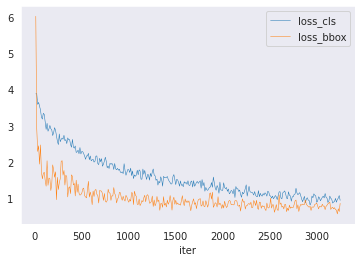

In [ ]:
# 21 Feb run - 25 epochs
%run tools/analysis_tools/analyze_logs.py plot_curve \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20220221_101536.log.json \
  --keys loss_cls loss_bbox \
  --legend loss_cls loss_bbox

# To skip plotting and save directly to directory, add
  # -\ -out work_dirs/results/losses.pdf

In [ ]:
!python tools/misc/visualize_results.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  --result work_dirs/results/mmdet3d_pred_results.pkl \
  --show-dir work_dirs/results/ 

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


## Benchmarking

Benchmark the inference speed of the model.

In [ ]:
!python tools/analysis_tools/benchmark.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  \work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/latest.pth \
  --fuse-conv-bn

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
load checkpoint from local path: work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/latest.pth
2022-02-21 19:13:27,630 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_0.projs.0.conv is upgraded to version 2.
2022-02-21 19:13:27,632 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_0.nodes.0.conv is upgraded to version 2.
2022-02-21 19:13:27,633 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_1.projs.0.conv is upgraded to version 2.
2022-02-21 19:13:27,633 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_1.projs.1.conv is upgraded to version 2.
2022-02-21 19:13:27,634 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_1.nodes.0.conv is upgraded to version 2.
2022-02-21 19:13:27,635 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_1.nodes.1.conv is upgraded to version 2.
2022-02-21 19:13:27,635 - root - INFO - ModulatedDeformConvPack neck.dla_u